Simple quick update latest weather

In [496]:
# Tell matplotlib to plot in line
%matplotlib inline

import datetime

# import pandas
import pandas

# seaborn magically adds a layer of goodness on top of Matplotlib
# mostly this is just changing matplotlib defaults, but it does also
# provide some higher level plotting methods.
import seaborn

# Tell seaborn to set things up
seaborn.set()

def smooth(data, thresh=None):
    
    means = data.mean()

    if thresh is None:
        sds = data.std()
    else:
        sds = thresh
    
    delta = data - data.shift()
    
    good = delta[abs(delta) < sds]

    #print(good.describe())
    
    return delta.where(good, 0.0)


In [515]:
infile = "../files/kittycam_weather.csv"

!scp 192.168.0.128:Adafruit_Python_BMP/weather.csv $infile

weather.csv                                   100%   67KB  67.0KB/s   00:00    


In [498]:
!wc ../files/weather.csv

  680  1359 65924 ../files/weather.csv


In [499]:
""" assume it is csv and let pandas do magic

  index_col tells it to use the 'date' column in the data
  as the row index, plotting picks up on this and uses the
  date on the x-axis

  The *parse_dates* bit just tells it to try and figure out
  the date/time in the columne labeled 'date'.
"""
data = pandas.read_csv(infile, index_col='date', parse_dates=['date'])

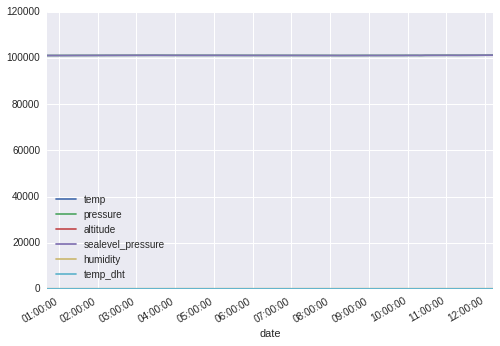

In [500]:
data.plot()

In [501]:
# smooth the data to filter out bad temps and pressures
data.altitude = (smooth(data.altitude, 5.0).cumsum() + data.altitude[0])
data.temp = (smooth(data.temp, 5.0).cumsum() + data.temp[0])

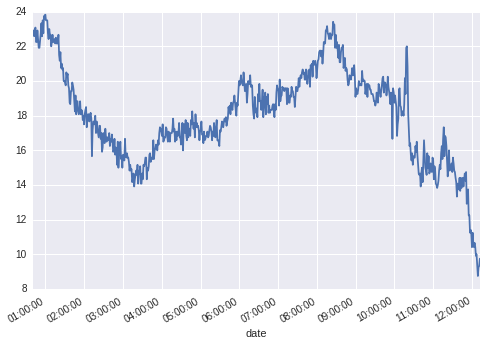

In [502]:
data.altitude.plot()

In [503]:
data.describe()

,temp,pressure,altitude,sealevel_pressure,humidity,temp_dht
count,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000
mean,26.885862,101108.057437,18.022840,101109.032401,82.626068,26.793078
std,0.735734,32.168453,2.696175,32.388891,3.027613,0.726487
min,24.600000,101039.000000,8.745406,101039.000000,68.800003,24.600000
25%,26.700000,101088.000000,16.330702,101088.000000,80.400002,26.500000
50%,27.100000,101105.000000,18.081939,101108.000000,82.800003,27.000000
75%,27.300000,101129.000000,19.750059,101130.000000,84.699997,27.200001
max,29.300000,101217.000000,23.838080,101223.000000,90.599998,28.900000


### Last 24 hours:

In [504]:
datetime.datetime.now()

datetime.datetime(2015, 7, 23, 9, 13, 12, 894592)

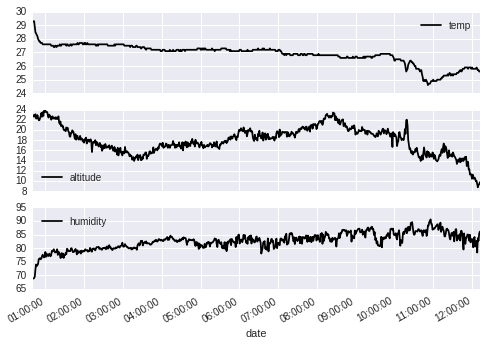

In [505]:
# reading is once a minute, so take last 24 * 60 readings
def plotem(data, n=-60):
    
    
    if n < 0:
        start = n
        end = len(data)
    else:
        start = 0
        end = n
        
    data[['temp', 'altitude', 'humidity']][n:].plot(subplots=True)
        
plotem(data, -24*60)

### Last week

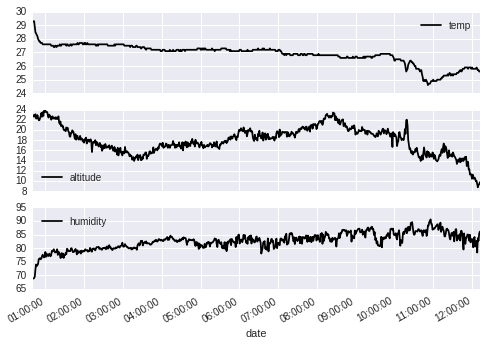

In [506]:
# reading is once a minute, so take last 7 * 24 * 60 readings
plotem(data, -7*24*60)

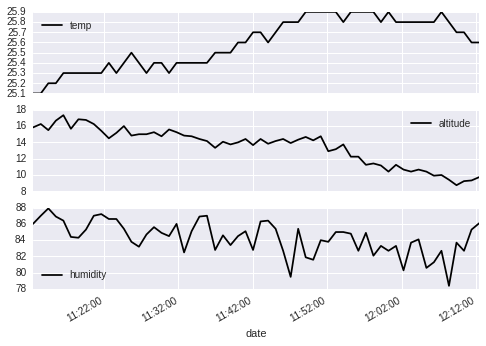

In [507]:
plotem(data)

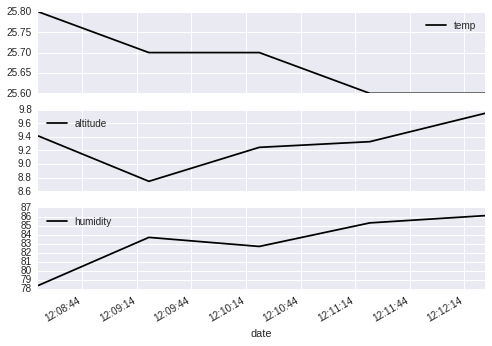

In [508]:
plotem(data, -5)

## Look at all the data

In [509]:
data.describe()

,temp,pressure,altitude,sealevel_pressure,humidity,temp_dht
count,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000
mean,26.885862,101108.057437,18.022840,101109.032401,82.626068,26.793078
std,0.735734,32.168453,2.696175,32.388891,3.027613,0.726487
min,24.600000,101039.000000,8.745406,101039.000000,68.800003,24.600000
25%,26.700000,101088.000000,16.330702,101088.000000,80.400002,26.500000
50%,27.100000,101105.000000,18.081939,101108.000000,82.800003,27.000000
75%,27.300000,101129.000000,19.750059,101130.000000,84.699997,27.200001
max,29.300000,101217.000000,23.838080,101223.000000,90.599998,28.900000


I currently have two temperature sensors:

* DHT22 sensor which gives temperature and humidity.
* BMP180 sensor which gives pressure and temperature.

The plot below shows the two temperature plots.

Both these sensors are currently in my study.  For temperature and humidity I would like to have some readings from outside.  If I can solder them to a phone jack then I can just run phone cable to where they need to be.

**Below** plots the current values from these sensors.  This is handy for calibration.

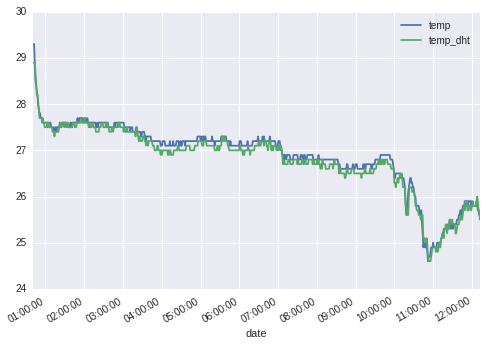

In [510]:
data[['temp', 'temp_dht']].plot()

## Dew Point

The warmer air is, the more moisture it can hold.  The *dew point* is
the temperature at which air would be totally saturated if it had as 
much moisture as it currently does. 

Given the temperature and humidity the *dew point* can be calculated, the actual formula is
pretty complex.

It is explained in more detail here: http://iridl.ldeo.columbia.edu/dochelp/QA/Basic/dewpoint.html

>If you are interested in a simpler calculation that gives an approximation of dew point temperature if you know >the observed temperature and relative humidity, the following formula was proposed in a 2005 article by Mark G. >Lawrence in the Bulletin of the American Meteorological Society:

$$Td = T - ((100 - RH)/5.)$$


In [511]:
data['dewpoint'] = data.temp - ((100. - data.humidity)/5.)

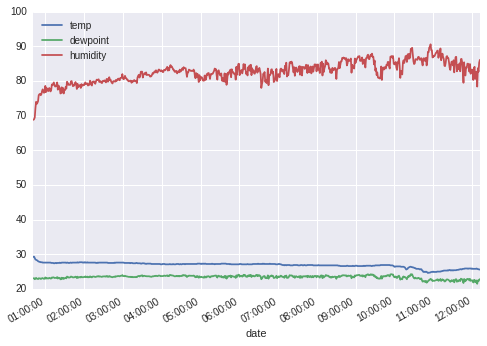

In [512]:
data[['temp', 'dewpoint', 'humidity']].plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f419bc76cc0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f419bb79e10>], dtype=object)

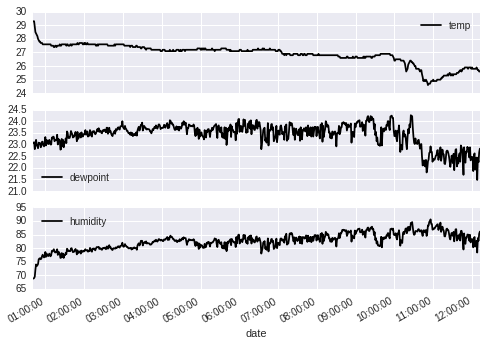

In [513]:
data[['temp', 'dewpoint', 'humidity']].plot(subplots=True)

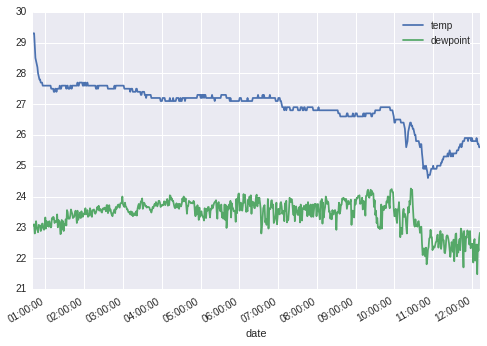

In [514]:
data[['temp', 'dewpoint']].plot()